<a href="https://colab.research.google.com/github/hoangvn111/Data-Cleaning-Walkthrough/blob/master/Data_Cleaning_Walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Data Cleaning Walkthrough

## Introduction

The SAT, or Scholastic Aptitude Test, is an exam that U.S. high school students take before applying to college. Colleges take the test scores into account when deciding who to admit, so it's fairly important to perform well on it.

The test consists of three sections, each of which has 800 possible points. The combined score is out of 2,400 possible points (while this number has changed a few times, the data set for our project is based on 2,400 total points). Organizations often rank high schools by their average SAT scores. The scores are also considered a measure of overall school district quality.

New York City makes its [data on high school SAT scores](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4) available online, as well as the [demographics for each high school](https://data.cityofnewyork.us/Education/2014-2015-DOE-High-School-Directory/n3p6-zve2). The first few rows of the SAT data look like this:



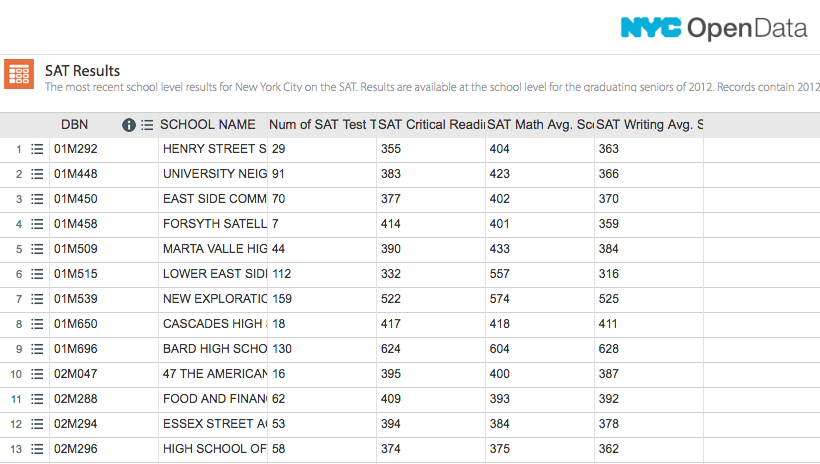

Unfortunately, combining both of the data sets won't give us all of the demographic information we want to use. We'll need to supplement our data with other sources to do our full analysis.

The same website has several related data sets covering demographic information and test scores. Here are the links to all of the data sets we'll be using:

* **SAT scores by school** - SAT scores for each high school in New York City
* **School attendance** - Attendance information for each school in New York City
* **Class size** - Information on class size for each school
* **AP test results** - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
* **Graduation outcomes** - The percentage of students who graduated, and other outcome information
* Demographics - Demographic information for each school
* **School survey** - Surveys of parents, teachers, and students at each school

All of these data sets are interrelated. We'll need to combine them into a single data set before we can find correlations.

Before we move into coding, we'll need to do some background research. A thorough understanding of the data will help us avoid costly mistakes, such as thinking that a column represents something other than what it does. Background research will also give us a better understanding of how to combine and analyze the data.

In this case, we'll want to research:

* [New York City](https://en.wikipedia.org/wiki/New_York_City)
* [The SAT](https://en.wikipedia.org/wiki/SAT)
* [Schools in New York City](https://en.wikipedia.org/wiki/List_of_high_schools_in_New_York_City)
* [Our data](https://data.cityofnewyork.us/browse?category=Education)

We can learn a few different things from these resources. For example:

Only high school students take the SAT, so we'll want to focus on high schools.
New York City is made up of five boroughs, which are essentially distinct regions.
New York City schools fall within several different school districts, each of which can contains dozens of schools.
Our data sets include several different types of schools. We'll need to clean them so that we can focus on high schools only.
Each school in New York City has a unique code called a DBN, or district borough number.
Aggregating data by district will allow us to use the district mapping data to plot district-by-district differences.

We can learn a few different things from these resources. For example:

* Only high school students take the SAT, so we'll want to focus on high schools.
* New York City is made up of five boroughs, which are essentially distinct regions.
* New York City schools fall within several different school districts, each of which can contains dozens of schools.
* Our data sets include several different types of schools. We'll need to clean them so that we can focus on high schools only.
* Each school in New York City has a unique code called a DBN, or district borough number.
* Aggregating data by district will allow us to use the district mapping data to plot district-by-district differences.

## Reading in the Data

In [2]:
import pandas as pd
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}

for file in data_files:
    df = pd.read_csv('/content/drive/MyDrive/my_datasets/Data Cleaning Walkthrough/{}'.format(file))
    file_name = file.split('.')[0]
    data[file_name] = df

data['ap_2010']


,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0
1,01M450,EAST SIDE COMMUNITY HS,19.0,21.0,NaN
2,01M515,LOWER EASTSIDE PREP,24.0,26.0,24.0
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,191.0
4,02M296,High School of Hospitality Management,NaN,NaN,NaN
...,...,...,...,...,...
253,31R605,STATEN ISLAND TECHNICAL HS,528.0,905.0,809.0
254,32K545,EBC-HS FOR PUB SERVICE (BUSH),47.0,64.0,13.0
255,32K552,Academy of Urban Planning,76.0,100.0,10.0
256,32K554,All City Leadership Secondary School,7.0,8.0,NaN


## Exploring the SAT Data

In [3]:
# Exploring the SAT_results dataset
data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


We can make a few observations based on this output:

* The DBN appears to be a unique ID for each school.
* We can tell from the first few rows of names that we only have data about high schools.
* There's only a single row for each high school, so each DBN is unique in the SAT data.
* We may eventually want to combine the three columns that contain ***SAT scores -- SAT Critical Reading Avg. Score***, ***SAT Math Avg. Score***, and ***SAT Writing Avg. Score*** -- into a single column to make the scores easier to analyze.

## Exploring the Remaining Data

In [4]:
for key in data:
    print(key)
    print(data[key].head())
    print(data[key].columns)
    print('\n')

ap_2010
      DBN  ... Number of Exams with scores 3 4 or 5
0  01M448  ...                                 10.0
1  01M450  ...                                  NaN
2  01M515  ...                                 24.0
3  01M539  ...                                191.0
4  02M296  ...                                  NaN

[5 rows x 5 columns]
Index(['DBN', 'SchoolName', 'AP Test Takers ', 'Total Exams Taken',
       'Number of Exams with scores 3 4 or 5'],
      dtype='object')


class_size
   CSD BOROUGH  ... DATA SOURCE SCHOOLWIDE PUPIL-TEACHER RATIO
0    1       M  ...         ATS                            NaN
1    1       M  ...         ATS                            NaN
2    1       M  ...         ATS                            NaN
3    1       M  ...         ATS                            NaN
4    1       M  ...         ATS                            NaN

[5 rows x 16 columns]
Index(['CSD', 'BOROUGH', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE ',
       'PROGRAM TYPE', 'CORE SUBJECT (MS 

**TAKE A LOOK**

We can make some observations based on the first few rows of each one.

* Each data set appears to either have a **DBN** column, or the information we need to create one. That means we can use a **DBN** column to combine the data sets. First we'll pinpoint matching rows from different data sets by looking for identical **DBNs**, then group all of their columns together in a single data set.
* Some fields look interesting for mapping -- particularly **Location 1**, which contains coordinates inside a larger string.
* Some of the data sets appear to contain multiple rows for each school (because the rows have duplicate **DBN** values). That means we’ll have to do some preprocessing to ensure that each **DBN** is unique within each data set. If we don't do this, we'll run into problems when we combine the data sets, because we might be merging two rows in one data set with one row in another data set.

## Reading in the Survey Data


In [5]:
all_survey = pd.read_csv('/content/drive/MyDrive/my_datasets/Data Cleaning Walkthrough/all_survey.txt', delimiter='\t', encoding='windows-1252')
d75_survey = pd.read_csv('/content/drive/MyDrive/my_datasets/Data Cleaning Walkthrough/survey_d75.txt', delimiter='\t', encoding='windows-1252')

all_survey.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,N_s,N_t,N_p,nr_s,nr_t,nr_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,p_q2h,p_q7a,p_q7b,p_q7c,p_q7d,p_q8a,p_q8b,p_q8c,...,s_N_q13e_1,s_N_q13e_2,s_N_q13e_3,s_N_q13e_4,s_N_q13f_1,s_N_q13f_2,s_N_q13f_3,s_N_q13f_4,s_N_q13g_1,s_N_q13g_2,s_N_q13g_3,s_N_q13g_4,s_N_q14a_1,s_N_q14a_2,s_N_q14a_3,s_N_q14a_4,s_N_q14b_1,s_N_q14b_2,s_N_q14b_3,s_N_q14b_4,s_N_q14c_1,s_N_q14c_2,s_N_q14c_3,s_N_q14c_4,s_N_q14d_1,s_N_q14d_2,s_N_q14d_3,s_N_q14d_4,s_N_q14e_1,s_N_q14e_2,s_N_q14e_3,s_N_q14e_4,s_N_q14f_1,s_N_q14f_2,s_N_q14f_3,s_N_q14f_4,s_N_q14g_1,s_N_q14g_2,s_N_q14g_3,s_N_q14g_4
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,NaN,22.0,90.0,0,25,150,8.5,7.6,7.5,7.8,7.5,7.8,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9,8.0,8.2,8.3,7.5,7.9,6.8,8.7,9.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,NaN,34.0,161.0,0,33,269,8.4,7.6,7.6,7.8,8.6,8.5,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4,7.7,7.9,8.0,7.3,7.7,6.5,8.8,9.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,NaN,42.0,367.0,0,48,505,8.9,8.3,8.3,8.6,7.6,6.3,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0,8.1,8.8,8.9,8.5,8.4,7.6,9.2,9.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.0,Elementary / Middle School,89.0,73,50,145.0,29.0,151.0,163,40,301,8.8,8.2,8.0,8.5,7.0,6.2,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9,8.1,8.5,8.8,8.2,8.3,7.3,9.2,9.4,...,76.0,35.0,14.0,17.0,100.0,30.0,6.0,4.0,89.0,28.0,9.0,12.0,32.0,68.0,21.0,16.0,23.0,60.0,32.0,25.0,43.0,66.0,19.0,12.0,39.0,68.0,18.0,16.0,35.0,70.0,20.0,16.0,23.0,54.0,33.0,29.0,31.0,46.0,16.0,8.0
4,01M063,M063,P.S. 063 William McKinley,0,No,0.0,Elementary School,NaN,100,60,NaN,23.0,90.0,0,23,151,8.7,7.9,8.1,7.9,8.4,7.3,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0,8.0,8.4,8.6,8.0,8.0,6.5,8.8,9.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
d75_survey.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,N_s,N_t,N_p,nr_s,nr_t,nr_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,p_q1c,p_q10a,p_q10b,p_q10c,p_q10d,p_q10e,p_q10f,p_q11a,...,s_q12g_4,s_q13a_1,s_q13a_2,s_q13a_3,s_q13a_4,s_q13b_1,s_q13b_2,s_q13b_3,s_q13b_4,s_q13c_1,s_q13c_2,s_q13c_3,s_q13c_4,s_q13d_1,s_q13d_2,s_q13d_3,s_q13d_4,s_q13e_1,s_q13e_2,s_q13e_3,s_q13e_4,s_q13f_1,s_q13f_2,s_q13f_3,s_q13f_4,s_q13g_1,s_q13g_2,s_q13g_3,s_q13g_4,s_q14_1,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,75K004,K004,P.S. K004,1,Yes,0.0,District 75 Special Education,38.0,90,72,8.0,81,244,21,90,337,9.1,8.6,8.4,8.5,7.4,6.6,6.4,6.4,7.6,5.8,7.6,6.3,8.0,7.0,7.5,7.1,8.7,9.0,9.0,8.9,8.8,8.9,8.9,7.3,...,0.0,0.0,100.0,0.0,0.0,14.0,86.0,0.0,0.0,14.0,86.0,0.0,0.0,0.0,86.0,14.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,71.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,75K036,K036,P.S. 36,1,Yes,NaN,District 75 Special Education,70.0,69,44,97.0,43,115,139,62,263,9.2,8.7,8.6,8.8,6.9,7.1,6.1,7.2,6.6,6.9,7.3,7.7,7.5,7.6,7.3,7.9,8.8,9.3,9.2,9.0,9.1,9.3,9.2,7.6,...,10.0,46.0,43.0,7.0,4.0,42.0,39.0,17.0,2.0,52.0,39.0,4.0,4.0,41.0,40.0,12.0,7.0,42.0,31.0,19.0,8.0,37.0,38.0,12.0,12.0,35.0,47.0,10.0,8.0,13.0,20.0,27.0,19.0,9.0,2.0,6.0,1.0,2.0,0.0,0.0
2,75K053,K053,P.S. K053,1,Yes,NaN,District 75 Special Education,94.0,97,53,131.0,75,189,139,77,355,8.8,8.1,8.0,8.1,7.8,7.5,6.9,8.0,8.2,7.7,8.6,8.5,8.2,7.8,7.8,8.2,8.3,8.6,8.8,8.4,8.6,8.7,8.4,7.3,...,1.0,52.0,39.0,8.0,1.0,53.0,40.0,5.0,2.0,70.0,26.0,4.0,0.0,66.0,29.0,4.0,1.0,63.0,35.0,2.0,0.0,50.0,33.0,13.0,4.0,58.0,41.0,1.0,1.0,5.0,14.0,12.0,12.0,10.0,21.0,13.0,11.0,2.0,0.0,0.0
3,75K077,K077,P.S. K077,1,Yes,NaN,District 75 Special Education,95.0,65,55,70.0,52,150,74,80,274,9.4,8.7,8.8,8.9,7.1,6.2,6.4,6.3,8.6,8.3,8.6,8.8,8.3,7.7,7.9,8.0,8.8,9.2,9.2,9.1,9.1,9.1,8.9,9.5,...,3.0,54.0,43.0,1.0,1.0,55.0,36.0,7.0,1.0,59.0,38.0,1.0,1.0,57.0,35.0,4.0,4.0,61.0,36.0,1.0,1.0,56.0,34.0,7.0,3.0,64.0,33.0,1.0,1.0,3.0,14.0,14.0,7.0,11.0,16.0,10.0,6.0,4.0,7.0,7.0
4,75K140,K140,P.S. K140,1,Yes,0.0,District 75 Special Education,77.0,70,42,69.0,45,117,90,64,277,8.6,8.2,7.9,8.3,5.6,5.8,5.1,6.0,4.7,6.1,6.0,7.3,6.3,6.7,6.3,7.2,8.8,8.6,8.8,8.4,8.4,8.5,8.6,6.4,...,34.0,18.0,62.0,5.0,15.0,23.0,27.0,17.0,33.0,34.0,25.0,31.0,11.0,17.0,14.0,42.0,28.0,18.0,11.0,34.0,37.0,6.0,22.0,25.0,48.0,19.0,25.0,22.0,34.0,12.0,35.0,34.0,17.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Combine d75_survey and all_survey into a single dataframe
survey = pd.concat([all_survey,d75_survey], axis=0)

survey.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,N_s,N_t,N_p,nr_s,nr_t,nr_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,p_q2h,p_q7a,p_q7b,p_q7c,p_q7d,p_q8a,p_q8b,p_q8c,...,s_q10_4,s_q11a_1,s_q11a_2,s_q11a_3,s_q11a_4,s_q11b_1,s_q11b_2,s_q11b_3,s_q11b_4,s_q11c_1,s_q11c_2,s_q11c_3,s_q11c_4,s_q12d_1,s_q12d_2,s_q12d_3,s_q12d_4,s_q12e_1,s_q12e_2,s_q12e_3,s_q12e_4,s_q12f_1,s_q12f_2,s_q12f_3,s_q12f_4,s_q12g_1,s_q12g_2,s_q12g_3,s_q12g_4,s_q14_1,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,NaN,22.0,90.0,0,25,150,8.5,7.6,7.5,7.8,7.5,7.8,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9,8.0,8.2,8.3,7.5,7.9,6.8,8.7,9.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,NaN,34.0,161.0,0,33,269,8.4,7.6,7.6,7.8,8.6,8.5,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4,7.7,7.9,8.0,7.3,7.7,6.5,8.8,9.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,NaN,42.0,367.0,0,48,505,8.9,8.3,8.3,8.6,7.6,6.3,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0,8.1,8.8,8.9,8.5,8.4,7.6,9.2,9.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.0,Elementary / Middle School,89.0,73,50,145.0,29.0,151.0,163,40,301,8.8,8.2,8.0,8.5,7.0,6.2,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9,8.1,8.5,8.8,8.2,8.3,7.3,9.2,9.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M063,M063,P.S. 063 William McKinley,0,No,0.0,Elementary School,NaN,100,60,NaN,23.0,90.0,0,23,151,8.7,7.9,8.1,7.9,8.4,7.3,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0,8.0,8.4,8.6,8.0,8.0,6.5,8.8,9.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are two immediate facts that we can see in the data:

* There are over 2000 columns, nearly all of which we don't need. We'll have to filter the data to remove the unnecessary ones. Working with fewer columns will make it easier to print the dataframe out and find correlations within it.
* The survey data has a **dbn** column that we'll want to convert to uppercase (**DBN**). The conversion will make the column name consistent with the other data sets.

## Cleaning Up the Surveys

First, we'll need to filter the columns to remove the ones we don't need. Luckily, there's a data dictionary at the [original data download location](https://drive.google.com/file/d/1LFi3x3-Pw0RsLsMrTdXuLEQTRQtPBm6F/view?usp=sharing). The dictionary tells us what each column represents. Based on our knowledge of the problem and the analysis we're trying to do, we can use the data dictionary to determine which columns to use.

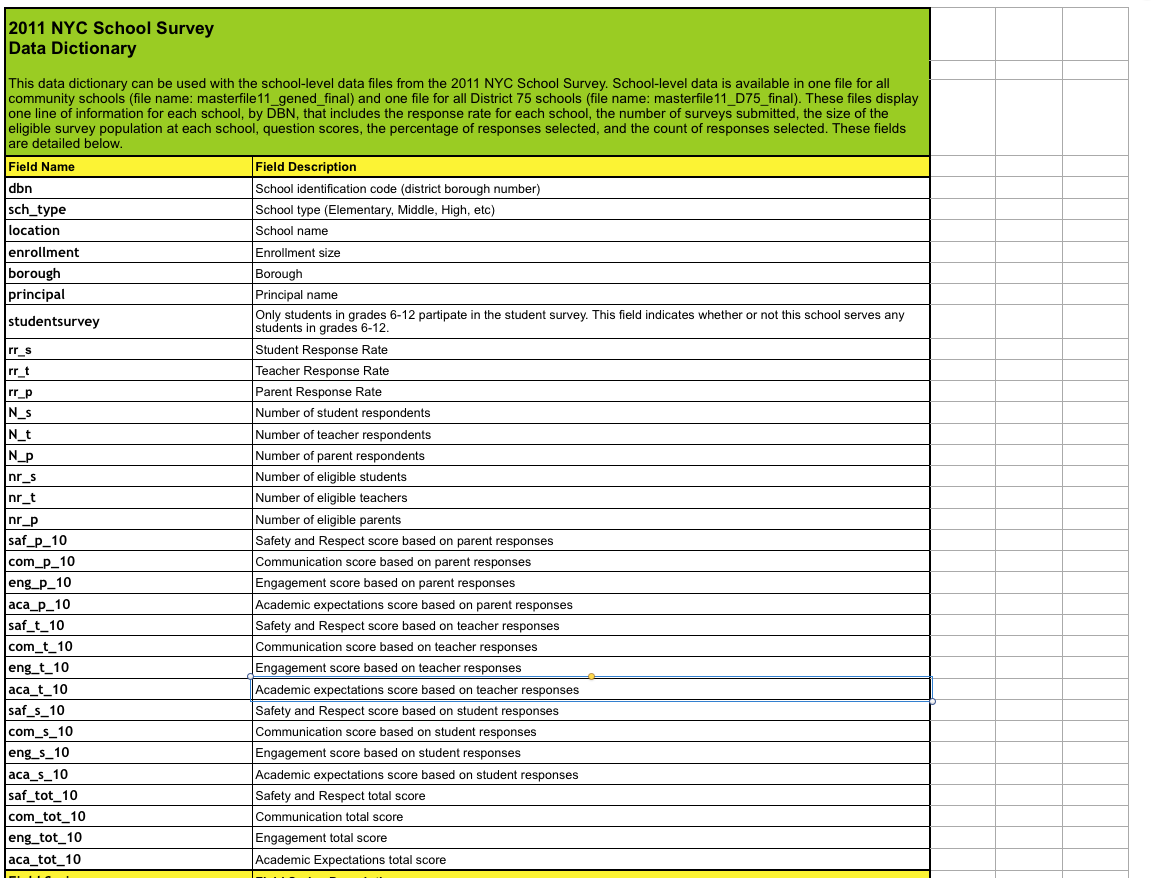

Based on the dictionary, it looks like these are the relevant columns:

["dbn", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]

In [8]:
# Copy the data from the dbn column of survey into the new column in survey called DBN
survey['DBN'] = survey['dbn']

In [9]:
list_columns = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]
# Filter survey so it only contains the columns we listed above 
survey = survey[list_columns]

# Assign df survey to th key survey in the dict data
data['survey'] = survey

data['survey']

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,7.8,7.5,7.8,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,7.8,8.6,8.5,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,8.6,7.6,6.3,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,8.5,7.0,6.2,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,7.9,8.4,7.3,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,75X352,90.0,58,48,38.0,46.0,160.0,8.9,8.3,7.9,8.2,6.4,5.5,5.7,5.8,6.8,6.0,7.8,7.6,7.4,6.6,7.1,7.2
52,75X721,84.0,90,48,237.0,82.0,239.0,8.6,7.6,7.5,7.7,7.6,6.4,6.7,7.0,7.8,7.2,7.8,7.9,8.0,7.1,7.3,7.6
53,75X723,77.0,74,20,103.0,69.0,74.0,8.4,7.8,7.8,7.8,7.7,7.2,6.7,7.6,6.7,7.2,7.7,7.7,7.6,7.4,7.4,7.7
54,75X754,63.0,93,22,336.0,82.0,124.0,8.3,7.5,7.5,7.8,6.7,6.5,6.6,7.1,6.8,6.6,7.6,7.7,7.2,6.9,7.3,7.5


## Inserting DBN fields

When we explored all of the data sets, we noticed that some of them, like **class_size** and **hs_directory**, don't have a DBN column. **hs_directory** does have a dbn column, though, so we can just rename it.

In [10]:
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


Here are the first few rows of the **sat_results** data, which does have a **DBN** column:



In [11]:
data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


From looking at these rows, we can tell that the **DBN** in the **sat_results** data is just a combination of the **CSD** and **SCHOOL CODE** columns in the **class_size** data. The main difference is that the **DBN** is padded, so that the **CSD** portion of it always consists of two digits. That means we'll need to add a leading **0** to the **CSD** if the **CSD** is less than two digits long. Here's a diagram illustrating what we need to do:

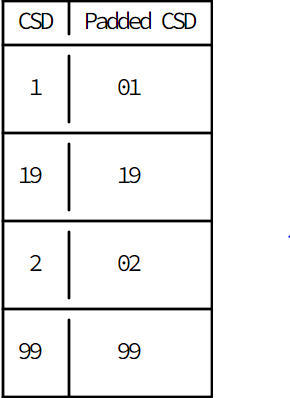

And here's a diagram illustrating the basic concept:


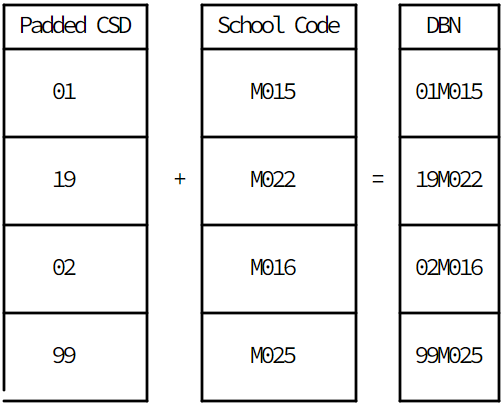

In [12]:
# class_size dataset => data['class_size']

# Create padded_csd column in the class_size dataset
data['class_size']['padded_csd'] = data['class_size']['CSD'].astype('str').str.zfill(2)

# Create DBN column in the class_size dataset
data['class_size']['DBN'] = data['class_size']['padded_csd'] + data['class_size']['SCHOOL CODE']

# check new column DBN
data['class_size']['DBN']

0        01M015
1        01M015
2        01M015
3        01M015
4        01M015
          ...  
27606    32K564
27607    32K564
27608    32K564
27609    32K564
27610    32K564
Name: DBN, Length: 27611, dtype: object

In [13]:
# copy the column dbn to the new column DBN

data['hs_directory']['DBN'] = data['hs_directory']['dbn']

# check new column DBN
data['hs_directory']['DBN']

0      27Q260
1      21K559
2      16K393
3      08X305
4      03M485
        ...  
430    02M300
431    09X412
432    32K549
433    02M407
434    21K344
Name: DBN, Length: 435, dtype: object

### Combining the SAT Scores 

In [14]:
# list columns name need to convert 
list_columns = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score'] 
# Convert data of columns to numeric
for l in list_columns:
    data['sat_results'][l] = pd.to_numeric(data['sat_results'][l], errors='coerce')


# combine data from 3 columns into 1 new column sat_results
data['sat_results']['sat_score'] = data['sat_results'][list_columns].sum(axis=1)

data['sat_results']['sat_score']

0      1122.0
1      1172.0
2      1149.0
3      1174.0
4      1207.0
        ...  
473       0.0
474       0.0
475       0.0
476    1322.0
477    1097.0
Name: sat_score, Length: 478, dtype: float64

## Parsing Geographic Coordinates for Schools

we'll want to parse the latitude and longitude coordinates for each school. This will enable us to map the schools and uncover any geographic patterns in the data. The coordinates are currently in the text field **Location 1** in the **hs_directory** data set.

In [15]:
data['hs_directory']['Location 1']

0      8 21 Bay 25 Street\nFar Rockaway, NY 11691\n(4...
1      2630 Benson Avenue\nBrooklyn, NY 11214\n(40.59...
2      1014 Lafayette Avenue\nBrooklyn, NY 11221\n(40...
3      1980 Lafayette Avenue\nBronx, NY 10473\n(40.82...
4      100 Amsterdam Avenue\nNew York, NY 10023\n(40....
                             ...                        
430    525 West 50Th Street\nNew York, NY 10019\n(40....
431    240 East 172 Street\nBronx, NY 10457\n(40.8403...
432    400 Irving Avenue\nBrooklyn, NY 11237\n(40.696...
433    345 East 15Th Street\nNew York, NY 10003\n(40....
434    521 West Avenue\nBrooklyn, NY 11224\n(40.58211...
Name: Location 1, Length: 435, dtype: object

As you can see, this field contains a lot of information we don't need. We want to extract the coordinates, which are in parentheses at the end of the field. Here's an example:

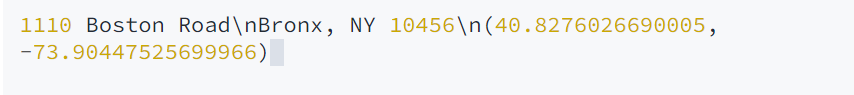

We want to extract the latitude, 40.8276026690005, and the longitude, -73.90447525699966. Taken together, latitude and longitude make up a pair of coordinates that allows us to pinpoint any location on Earth.

In [16]:
import re
# Example
re.findall("\(.+\)", "1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)")


['(40.8276026690005, -73.90447525699966)']

In [17]:
# Write func to find latitude
def find_lat(loc):
    coords = re.findall('\(.+\)', loc)
    lat = coords[0].split(',')[0].replace('(','')
    return lat

# Create new column latitude
data['hs_directory']['lat'] = data['hs_directory']['Location 1'].apply(find_lat) 

data['hs_directory']['lat']

0      40.601989336
1      40.593593811
2      40.692133704
3      40.822303765
4      40.773670507
           ...     
430    40.765026708
431    40.840373398
432    40.696961848
433    40.732485378
434     40.58211615
Name: lat, Length: 435, dtype: object

In [18]:
# Write func to find longitude
def find_lon(loc):
    coords = re.findall('\(.+\)', loc)
    lon = coords[0].split(',')[1].replace(')','')
    return lon

# Create new column longitude
data['hs_directory']['lon'] = data['hs_directory']['Location 1'].apply(find_lon)

data['hs_directory']['lon']

0       -73.762834323
1       -73.984729232
2       -73.931503172
3        -73.85596139
4       -73.985268558
            ...      
430     -73.992516578
431     -73.910838008
432     -73.910815939
433     -73.983053388
434     -73.972894492
Name: lon, Length: 435, dtype: object

In [19]:
# Convert 2 columns lat, loc to number dtype
data['hs_directory']['lat'] = pd.to_numeric(data['hs_directory']['lat'], errors='coerce')
data['hs_directory']['lon'] = pd.to_numeric(data['hs_directory']['lon'], errors='coerce')


# Data Cleaning Walkthrough: Combining the Data

## Introduction

In this mission, we'll clean the data a bit more, then combine it. Finally, we'll compute correlations and perform some analysis.

The first thing we'll need to do in preparation for the merge is condense some of the data sets. In the last mission, we noticed that the values in the **DBN** column were unique in the **sat_results** data set. Other data sets like **class_size** had duplicate **DBN** values, however.

We'll need to condense these data sets so that each value in the **DBN** column is unique. If not, we'll run into issues when it comes time to combine the data sets.

While the main data set we want to analyze, **sat_results**, has unique **DBN** values for every high school in New York City, other data sets aren't as clean. A single row in the **sat_results** data set may match multiple rows in the **class_size** data set, for example. This situation will create problems, because we don't know which of the multiple entries in the **class_size** data set we should combine with the single matching entry in sat_results. Here's a diagram that illustrates the problem:

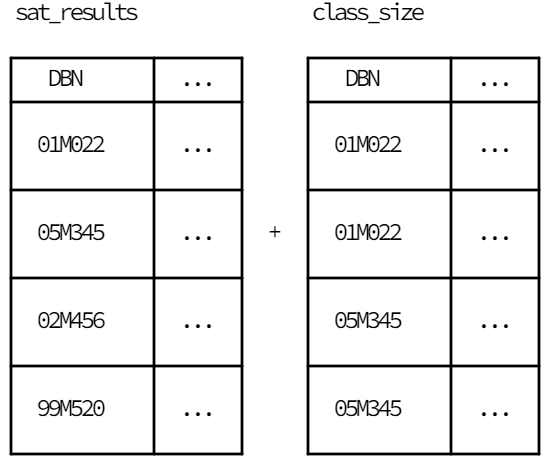

In the diagram above, we can't just combine the rows from both data sets because there are several cases where multiple rows in **class_size** match a single row in **sat_results**.

To resolve this issue, we'll condense the **class_size**, **graduation**, and **demographics** data sets so that each DBN is unique.

## Condensing the Class Size Data Set

The first data set that we'll condense is **class_size**. The first few rows of class_size look like this:

In [20]:
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


As you can see, the first few rows all pertain to the same school, which is why the **DBN** appears more than once. It looks like each school has multiple values for **GRADE**, **PROGRAM TYPE**, **CORE SUBJECT** (**MS CORE and 9-12 ONLY**), and **CORE COURSE (MS CORE and 9-12 ONLY)**.

If we look at the unique values for **GRADE**, we get the following:

In [21]:
# Explore the unique values in columns GRADE
data['class_size']['GRADE '].unique()

array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)

Because we're dealing with high schools, we're only concerned with grades **9** through **12**. That means we only want to pick rows where the value in the **GRADE** column is **09-12**.

If we look at the unique values for **PROGRAM TYPE**, we get the following:

In [22]:
data['class_size']['PROGRAM TYPE'].unique()

array(['GEN ED', 'CTT', 'SPEC ED', nan, 'G&T'], dtype=object)

Each school can have multiple program types. Because **GEN ED** is the largest category by far, let's only select rows where **PROGRAM TYPE** is GEN ED.

## Condensing the Class Size Data Set Continuous

In [23]:
# Create new variable assign df class_szie to it 
class_size = data['class_size']

# Filter class_size so the GRADE column only contains the value 09-12
class_size = class_size[class_size['GRADE '] == '09-12'] # 10644 rows left 

# Filter class_size so that the PROGRAM TYPE column only contains the value GEN ED
class_size = class_size[class_size['PROGRAM TYPE'] == 'GEN ED'] # 6513 rows left

class_size.head(3)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292


## Computing Average Class Sizes

As we saw when we displayed **class_size** on the last screen, **DBN** still isn't completely unique. This is due to the **CORE COURSE (MS CORE and 9-12 ONLY)** and **CORE SUBJECT (MS CORE and 9-12 ONLY)** columns.

**CORE COURSE (MS CORE and 9-12 ONLY)** and **CORE SUBJECT (MS CORE and 9-12 ONLY)** seem to pertain to different kinds of classes. For example, here are the unique values for **CORE SUBJECT (MS CORE and 9-12 ONLY)**:

In [24]:
class_size['CORE SUBJECT (MS CORE and 9-12 ONLY)'].unique()

array(['ENGLISH', 'MATH', 'SCIENCE', 'SOCIAL STUDIES'], dtype=object)

This column only seems to include certain subjects. We want our class size data to include every single class a school offers -- not just a subset of them. What we can do is take the average across all of the classes a school offers. This will give us unique **DBN** values, while also incorporating as much data as possible into the average.

Fortunately, we can use the pandas.**DataFrame.groupby()** method to help us with this. The **DataFrame.groupby()** method will split a dataframe up into unique groups, based on a given column. We can then use the **agg()** method on the resulting pandas.core.groupby object to find the mean of each column.

Let's say we have this data set:

In [25]:
# Create dataset include 3 columns 
test = class_size[['DBN', 'CORE SUBJECT (MS CORE and 9-12 ONLY)', 'AVERAGE CLASS SIZE']]

test

,DBN,CORE SUBJECT (MS CORE and 9-12 ONLY),AVERAGE CLASS SIZE
225,01M292,ENGLISH,21.0
226,01M292,ENGLISH,26.3
227,01M292,ENGLISH,19.0
228,01M292,ENGLISH,23.0
229,01M292,MATH,17.7
...,...,...,...
27604,32K564,SCIENCE,24.5
27605,32K564,SOCIAL STUDIES,23.7
27606,32K564,SOCIAL STUDIES,25.6
27607,32K564,SOCIAL STUDIES,32.5


In [26]:
# Group by df following column DBN
grouped = test.groupby(['DBN'])
grouped_01M292 = grouped.get_group('01M292')
grouped_01M292

,DBN,CORE SUBJECT (MS CORE and 9-12 ONLY),AVERAGE CLASS SIZE
225,01M292,ENGLISH,21.0
226,01M292,ENGLISH,26.3
227,01M292,ENGLISH,19.0
228,01M292,ENGLISH,23.0
229,01M292,MATH,17.7
231,01M292,MATH,32.0
232,01M292,MATH,19.7
233,01M292,SCIENCE,31.3
234,01M292,SCIENCE,29.0
235,01M292,SCIENCE,19.6


In [27]:
# Calculate average of each group by agg() method
grouped = test.groupby(['DBN']).agg('mean')

grouped

,AVERAGE CLASS SIZE
DBN,
01M292,22.564286
01M332,22.000000
01M378,33.000000
01M448,22.231250
01M450,21.200000
...,...
32K549,22.760000
32K552,23.900000
32K554,17.793750


After we group a dataframe and aggregate data based on it, the column we performed the grouping on (in this case **DBN**) will become the index, and will no longer appear as a column in the data itself. To undo this change and keep **DBN** as a column, we'll need to use **pandas.DataFrame.reset_index()**. This method will reset the index to a list of integers and make **DBN** a column again.

## Computing Average Class Sizes Continuous

In [28]:
# Group class_size by DBN and use agg() to calculate the average of each group
class_size = class_size.groupby('DBN').agg('mean')

class_size

,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
DBN,,,,,,,
01M292,1,88.000000,4.000000,22.564286,18.500000,26.571429,NaN
01M332,1,46.000000,2.000000,22.000000,21.000000,23.500000,NaN
01M378,1,33.000000,1.000000,33.000000,33.000000,33.000000,NaN
01M448,1,105.687500,4.750000,22.231250,18.250000,27.062500,NaN
01M450,1,57.600000,2.733333,21.200000,19.400000,22.866667,NaN
...,...,...,...,...,...,...,...
32K549,32,71.066667,3.266667,22.760000,19.866667,25.866667,NaN
32K552,32,102.375000,4.312500,23.900000,19.937500,28.000000,NaN
32K554,32,66.937500,3.812500,17.793750,14.750000,21.625000,NaN


In [29]:
# Reset index to make DBN a column again
class_size.reset_index(inplace=True)

# Asign class_size back to data['class_size'] 
data['class_size'] = class_size

data['class_size']

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.000000,4.000000,22.564286,18.500000,26.571429,NaN
1,01M332,1,46.000000,2.000000,22.000000,21.000000,23.500000,NaN
2,01M378,1,33.000000,1.000000,33.000000,33.000000,33.000000,NaN
3,01M448,1,105.687500,4.750000,22.231250,18.250000,27.062500,NaN
4,01M450,1,57.600000,2.733333,21.200000,19.400000,22.866667,NaN
...,...,...,...,...,...,...,...,...
578,32K549,32,71.066667,3.266667,22.760000,19.866667,25.866667,NaN
579,32K552,32,102.375000,4.312500,23.900000,19.937500,28.000000,NaN
580,32K554,32,66.937500,3.812500,17.793750,14.750000,21.625000,NaN
581,32K556,32,132.333333,5.400000,25.060000,18.333333,30.000000,NaN


## Condensing the Demographics Data Set

In [30]:
# Explore the demographics dataset
data['demographics'] # have 10075 rows

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,ctt_num,selfcontained_num,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,38,52,29,38,NaN,NaN,NaN,NaN,NaN,NaN,36.0,12.8,57.0,20.3,25,9,10,3.6,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,34,42,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,15.6,55.0,22.6,19,15,18,7.4,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,38,47,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,19.9,60.0,23.0,20,14,16,6.1,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,34,39,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,19.0,62.0,24.6,21,17,16,6.3,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,30,24,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,19.2,46.0,22.1,14,14,16,7.7,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10070,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,20072008,85.6,NaN,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,355,NaN,NaN,21.0,5.9,21.0,5.9,4,NaN,1,0.3,151,42.5,198,55.8,5,1.4,181.0,51.0,174.0,49.0
10071,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,20082009,65.2,NaN,383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,383,NaN,NaN,10.0,2.6,28.0,7.3,13,NaN,3,0.8,132,34.5,245,64.0,2,0.5,206.0,53.8,177.0,46.2
10072,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,20092010,,89.2,395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,395,NaN,NaN,17.0,4.3,35.0,8.9,15,1,2,0.5,146,37.0,242,61.3,3,0.8,199.0,50.4,196.0,49.6
10073,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,20102011,,88.2,420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,420,NaN,NaN,20.0,4.8,37.0,8.8,17,NaN,1,0.2,166,39.5,242,57.6,8,1.9,209.0,49.8,211.0,50.2


In this case, the only column that prevents a given **DBN** from being unique is **schoolyear**. We only want to select rows where **schoolyear** is **20112012**. This will give us the most recent year of data, and also match our SAT results data.

In [31]:
# Fitler demopgraphics contains rows have only schoolyear = 20112012
data['demographics'] = data['demographics'][data['demographics']['schoolyear'] == 20112012]

data['demographics'] # have 1509 rows

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,ctt_num,selfcontained_num,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,25,28,29,,,,,,,,20.0,10.6,40.0,21.2,23,7,12,6.3,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,52,46,46,,,,,,,,33.0,10.1,59.0,18.0,16,16,51,15.5,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,88,85,91,,,,,,,,128.0,20.4,97.0,15.5,49,31,190,30.4,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,45,28,40,55,55,56,,,,,34.0,8.5,106.0,26.4,59,16,22,5.5,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,31,26,30,,,,,,,,6.0,3.4,45.0,25.6,34,4,9,5.1,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10046,32K549,BUSHWICK SCHOOL FOR SOCIAL JUSTICE,20112012,NaN,75.1,434,,,,,,,,,,,118,119,91,106,79.0,18.2,80.0,18.4,46,23,2,0.5,123,28.3,298,68.7,8,1.8,210.0,48.4,224.0,51.6
10053,32K552,ACADEMY OF URBAN PLANNING,20112012,NaN,77.1,398,,,,,,,,,,,93,104,111,90,95.0,23.9,88.0,22.1,26,47,6,1.5,105,26.4,280,70.4,4,1.0,217.0,54.5,181.0,45.5
10060,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,20112012,NaN,81.4,263,,,,,,,,60,32,31,37,34,34,35,7.0,2.7,13.0,4.9,1,2,14,5.3,34,12.9,209,79.5,4,1.5,137.0,52.1,126.0,47.9
10067,32K556,BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCELL,20112012,NaN,88.0,462,,,,,,,,,,,118,120,104,120,84.0,18.2,86.0,18.6,4,51,4,0.9,98,21.2,357,77.3,0,0.0,246.0,53.2,216.0,46.8


## Condensing the Graduation Data Set

In [32]:
data['graduation']

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,NaN,s,NaN,NaN,s,NaN,NaN,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3,17,30.9,45.9,0,0.0,0.0,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2,27,42.2,62.8,0,0.0,0.0,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,0,0.0,0.0,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4,37,47.4,84.1,0,0.0,0.0,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25091,Male,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2003,65,1,1.5,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1,1.5,100.0,44.0,67.7,20.0,30.8
25092,Male,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2004,64,2,3.1,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,2,3.1,100.0,38.0,59.4,22.0,34.4
25093,Male,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2005,79,3,3.8,1,1.3,33.3,0,0.0,0.0,1,1.3,33.3,2,2.5,66.7,46.0,58.2,28.0,35.4
25094,Male,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2006,57,4,7.0,2,3.5,50.0,0,0.0,0.0,2,3.5,50.0,2,3.5,50.0,34.0,59.6,17.0,29.8


The **Demographic** and **Cohort** columns are what prevent **DBN** from being unique in the **graduation** data. A **Cohort** appears to refer to the year the data represents, and the **Demographic** appears to refer to a specific **demographic** group. In this case, we want to pick data from the most recent **Cohort** available, which is **2006**. We also want data from the full cohort, so we'll only pick rows where **Demographic** is Total Cohort

In [33]:
data['graduation']['Cohort'].unique()

array(['2003', '2004', '2005', '2006', '2006 Aug', '2001', '2002'],
      dtype=object)

In [34]:
# Filter graduation, only selecting rows where the Cohort column equals 2006
data['graduation'] = data['graduation'][data['graduation']['Cohort'] == '2006']

# Filter graduation, only selecting rows where the Demographic column equals Total Cohort
data['graduation'] = data['graduation'][data['graduation']['Demographic'] == 'Total Cohort']

data['graduation']

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,0,0.0,0.0,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7,42,33.9,79.2,8,6.5,15.1,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8,67,74.4,95.7,0,0.0,0.0,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56.0,40,47.6,85.1,17,20.2,36.2,23,27.4,48.9,7,8.3,14.9,25,29.8,5,6.0
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4,91,47.2,86.7,69,35.8,65.7,22,11.4,21.0,14,7.3,13.3,53,27.5,35,18.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2482,Total Cohort,32K549,BUSHWICK SCHOOL FOR SOCIAL JUSTICE,2006,97,74,76.3,59,60.8,79.7,5,5.2,6.8,54,55.7,73.0,15,15.5,20.3,12,12.4,9,9.3
2489,Total Cohort,32K552,ACADEMY OF URBAN PLANNING,2006,115,55,47.8,41,35.7,74.5,1,0.9,1.8,40,34.8,72.7,14,12.2,25.5,44,38.3,10,8.7
2495,Total Cohort,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,2006,43,36,83.7,23,53.5,63.9,5,11.6,13.9,18,41.9,50.0,13,30.2,36.1,5,11.6,2,4.7
2502,Total Cohort,32K556,BUSHWICK LEADERS HIGH SCHOOL FOR ACAD,2006,117,65,55.6,28,23.9,43.1,5,4.3,7.7,23,19.7,35.4,37,31.6,56.9,24,20.5,22,18.8


## Converting AP Test Scores

In [35]:
data['ap_2010']

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0
1,01M450,EAST SIDE COMMUNITY HS,19.0,21.0,NaN
2,01M515,LOWER EASTSIDE PREP,24.0,26.0,24.0
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,191.0
4,02M296,High School of Hospitality Management,NaN,NaN,NaN
...,...,...,...,...,...
253,31R605,STATEN ISLAND TECHNICAL HS,528.0,905.0,809.0
254,32K545,EBC-HS FOR PUB SERVICE (BUSH),47.0,64.0,13.0
255,32K552,Academy of Urban Planning,76.0,100.0,10.0
256,32K554,All City Leadership Secondary School,7.0,8.0,NaN


The only remaining thing to do is convert the [Advanced Placement](https://en.wikipedia.org/wiki/Advanced_Placement_exams) (AP) test scores from strings to numeric values. High school students take the AP exams before applying to college. There are several AP exams, each corresponding to a school subject. High school students who earn high scores may receive college credit.

AP exams have a **1** to **5** scale; **3** or higher is a passing score. Many high school students take AP exams -- particularly those who attend academically challenging institutions. AP exams are much more rare in schools that lack funding or academic rigor.

It will be interesting to find out whether AP exam scores are correlated with SAT scores across high schools. To determine this, we'll need to convert the AP exam scores in the **ap_2010** data set to numeric values first.

In [36]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data['ap_2010'][col] = pd.to_numeric(data['ap_2010'][col], errors='coerce')

data['ap_2010'].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   DBN                                   258 non-null    object 
 1   SchoolName                            258 non-null    object 
 2   AP Test Takers                        233 non-null    float64
 3   Total Exams Taken                     233 non-null    float64
 4   Number of Exams with scores 3 4 or 5  151 non-null    float64
dtypes: float64(3), object(2)
memory usage: 10.2+ KB


## Merge datasets

We'll be using the **DBN** column to identify matching rows across data sets. In other words, the values in that column will help us know which row from the first data set to combine with which row in the second data set.

There may be **DBN** values that exist in one data set but not in another. This is partly because the data is from different years. Each data set also has inconsistencies in terms of how it was gathered. Human error (and other types of errors) may also play a role. Therefore, we may not find matches for the **DBN** values in sat_results in all of the other data sets, and other data sets may have **DBN** values that don't exist in **sat_results**.

We'll merge two data sets at a time. For example, we'll merge **sat_results** and **hs_directory**, then merge the result with **ap_2010**, then merge the result of that with **class_size**. We'll continue combining data sets in this way until we've merged all of them. Afterwards, we'll have roughly the same number of rows, but each row will have columns from all of the data sets.

The merge strategy we pick will affect the number of rows we end up with. Let's take a look at each strategy.

Let's say we're merging the following two data sets:

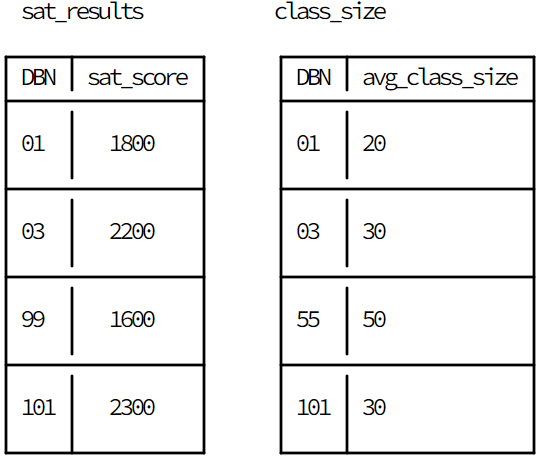

With an **inner** merge, we'd only combine rows where the same **DBN** exists in both data sets. We'd end up with this result:

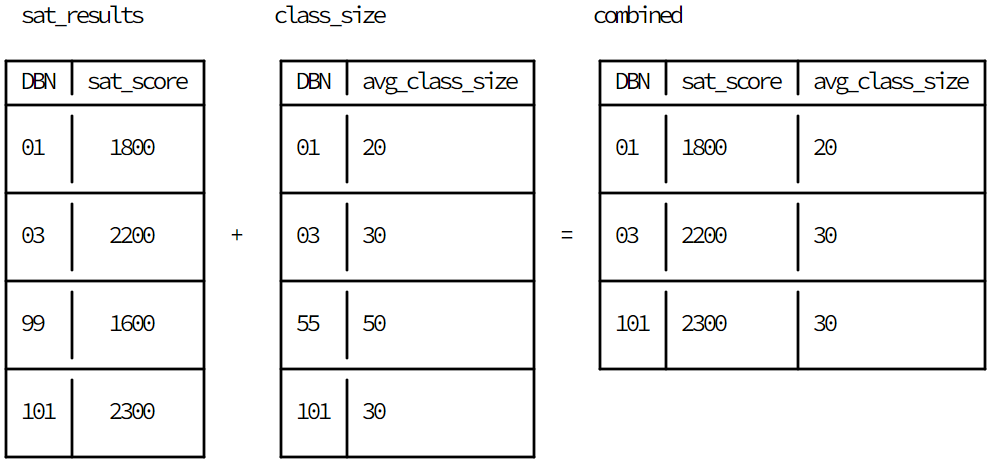

With a **left** merge, we'd only use **DBN** values from the dataframe on the "left" of the merge. In this case, **sat_results** is on the left. Some of the DBNs in **sat_results** don't exist in class_size, though. The merge will handle this by assiging null values to the columns in **sat_results** that don't have corresponding data in **class_size**

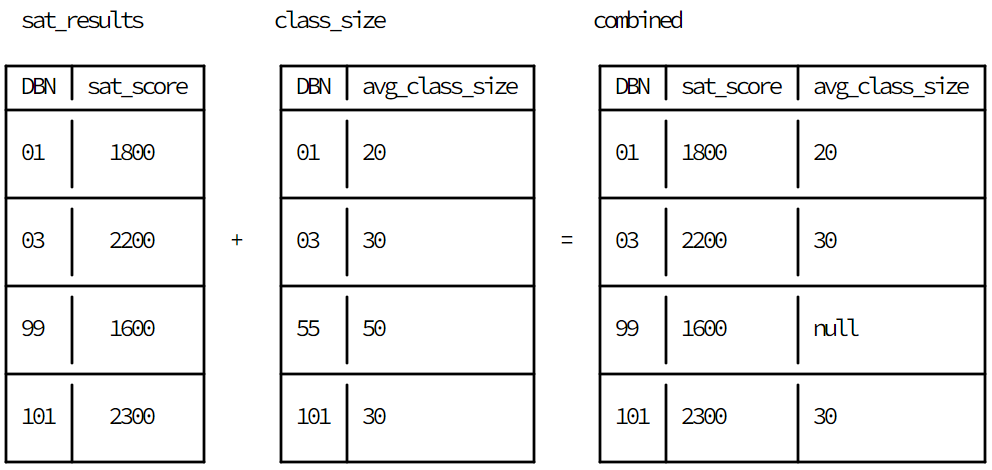

With a **right** merge, we'll only use **DBN** values from the dataframe on the "right" of the merge. In this case, **class_size** is on the right:

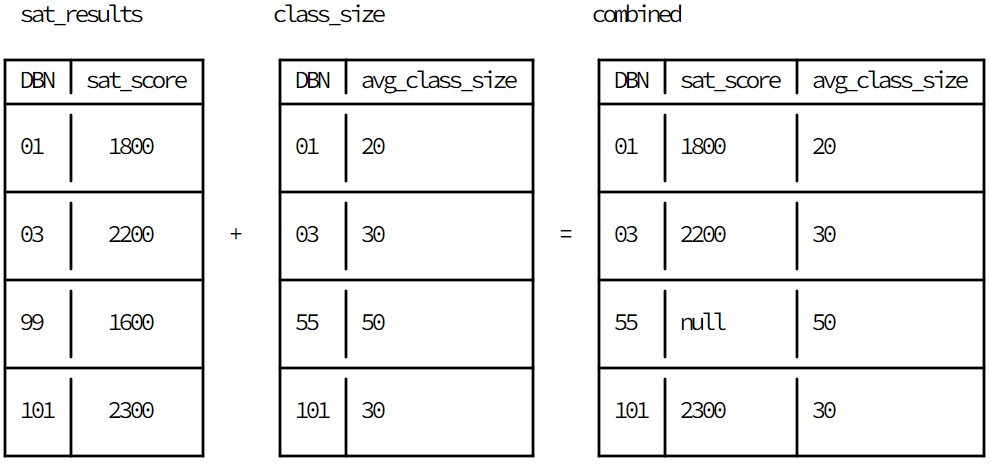

With an **outer** merge, we'll take any **DBN** values from either **sat_results** or **class_size**:



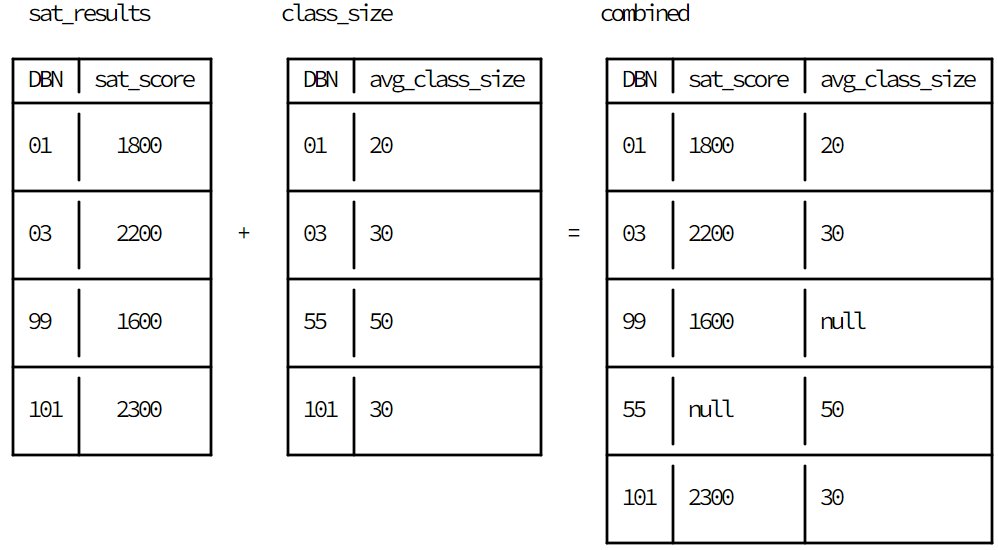

As you can see, each merge strategy has its advantages. Depending on the strategy we choose, we may preserve rows at the expense of having more missing column data, or minimize missing data at the expense of having fewer rows. Choosing a merge strategy is an important decision; it's worth thinking about your data carefully, and what trade-offs you're willing to make.

Because this project is concerned with determing demographic factors that correlate with SAT score, we'll want to preserve as many rows as possible from **sat_results** while minimizing null values.

This means that we may need to use different merge strategies with different data sets. Some of the data sets have a lot of missing **DBN** values. This makes a **left** join more appropriate, because we don't want to lose too many rows when we merge. If we did an **inner** join, we would lose the data for many high schools.

Some data sets have **DBN** values that are almost identical to those in **sat_results**. Those data sets also have information we need to keep. Most of our analysis would be impossible if a significant number of rows was missing from **demographics**, for example. Therefore, we'll do an inner join to avoid missing data in these columns.

## Performing the Left Joins

Both the **ap_2010** and the **graduation** data sets have many missing **DBN** values, so we'll use a **left** join when we merge the **sat_results** data set with them. Because we're using a **left** join, our final dataframe will have all of the same **DBN** values as the original **sat_results** dataframe.

In [37]:
combined = data['sat_results']
# combined = combined.merge(data['ap_2010'], how='left', on='DBN') 479x11
combined = combined.merge(data['ap_2010'], how='left')
combined = combined.merge(data['graduation'], how='left')
combined

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Demographic,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,NaN,Total Cohort,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78.0,43,55.1,36,46.2,83.7,0,0.0,0.0,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0,Total Cohort,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124.0,53,42.7,42,33.9,79.2,8,6.5,15.1,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,NaN,Total Cohort,EAST SIDE COMMUNITY SCHOOL,2006,90.0,70,77.8,67,74.4,95.7,0,0.0,0.0,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,NaN,Total Cohort,MARTA VALLE HIGH SCHOOL,2006,84.0,47,56.0,40,47.6,85.1,17,20.2,36.2,23,27.4,48.9,7,8.3,14.9,25,29.8,5,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,75X012,P.S. X012 LEWIS AND CLARK SCHOOL,s,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
475,75X754,J. M. RAPPORT SCHOOL CAREER DEVELOPMENT,s,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
476,79M645,SCHOOL FOR COOPERATIVE TECHNICAL EDUCATION,s,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
477,79Q950,GED PLUS s CITYWIDE,8,496.0,400.0,426.0,1322.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Performing the Inner Joins

Now that we've performed the **left** joins, we still have to merge **class_size**, **demographics**, **survey**, and **hs_directory** into combined. Because these files contain information that's more valuable to our analysis and also have fewer missing **DBN** values, we'll use the **inner** join type.

In [38]:
ss = ['class_size', 'demographics', 'survey', 'hs_directory']

# Merge datasets
for s in ss:
    combined = combined.merge(data[s], how='inner')

# Correct the dataset
combined

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Demographic,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO,...,extracurricular_activities,psal_sports_boys,psal_sports_girls,psal_sports_coed,school_sports,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,NaN,Total Cohort,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78.0,43,55.1,36,46.2,83.7,0,0.0,0.0,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1,1,88.000000,4.000000,22.564286,18.500000,26.571429,NaN,...,"Math through Card Play; Art, Poetry/Spoken Wor...",Softball,Softball,Soccer,"Boxing, Track, CHAMPS, Tennis, Flag Football, ...",The Henry Street Settlement; Asia Society; Ame...,Gouverneur Hospital (Turning Points),New York University,Asia Society,Heart of America Foundation,NaN,NaN,United Nations,NaN,NaN,8:30 AM,3:30 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to continuing 8th graders,Then to Manhattan students or residents who at...,Then to New York City residents who attend an ...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...,40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0,Total Cohort,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124.0,53,42.7,42,33.9,79.2,8,6.5,15.1,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1,1,105.687500,4.750000,22.231250,18.250000,27.062500,NaN,...,"Basketball, Badminton, Handball, Glee, Dance, ...","Basketball, Bowling, Cross Country, Softball, ...","Basketball, Bowling, Cross Country, Softball, ...",NaN,NaN,"Grand Street Settlement, Henry Street Settleme...","Gouverneur Hospital, The Door, The Mount Sinai...","New York University, CUNY Baruch College, Pars...","Dance Film Association, Dance Makers Film Work...","W!SE, Big Brothers Big Sisters, Peer Health Ex...",Deloitte LLP Consulting and Financial Services...,NaN,Movement Research,Incoming students are expected to attend schoo...,"Community Service Requirement, Dress Code Requ...",8:15 AM,3:15 PM,This school will provide students with disabil...,ESL,Not Functionally Accessible,3,Open to New York City residents,For M35B only: Open only to students whose hom...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202.0,1003214.0,1.002590e+09,Lower East Side ...,40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,NaN,Total Cohort,EAST SIDE COMMUNITY SCHOOL,2006,90.0,70,77.8,67,74.4,95.7,0,0.0,0.0,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6,1,57.600000,2.733333,21.200000,19.400000,22.866667,NaN,...,"After-School Tutoring, Art Portfolio Classes, ...","B

## Filling in Missing Values

You may have noticed that the inner joins resulted in **116** fewer rows in **sat_results**. This is because pandas couldn't find the **DBN** values that existed in **sat_results** in the other data sets. While this is worth investigating, we're currently looking for high-level correlations, so we don't need to dive into which DBNs are missing.

You may also have noticed that we now have many columns with null (**NaN**) values. This is because we chose to do **left** joins, where some columns may not have had data. The data set also had some missing values to begin with. If we hadn't performed a **left** join, all of the rows with missing data would have been lost in the merge process, which wouldn't have left us with many high schools in our data set.

There are several ways to handle missing data, and we'll cover them in more detail later on. For now, we'll just fill in the missing values with the overall mean for the column, like so:

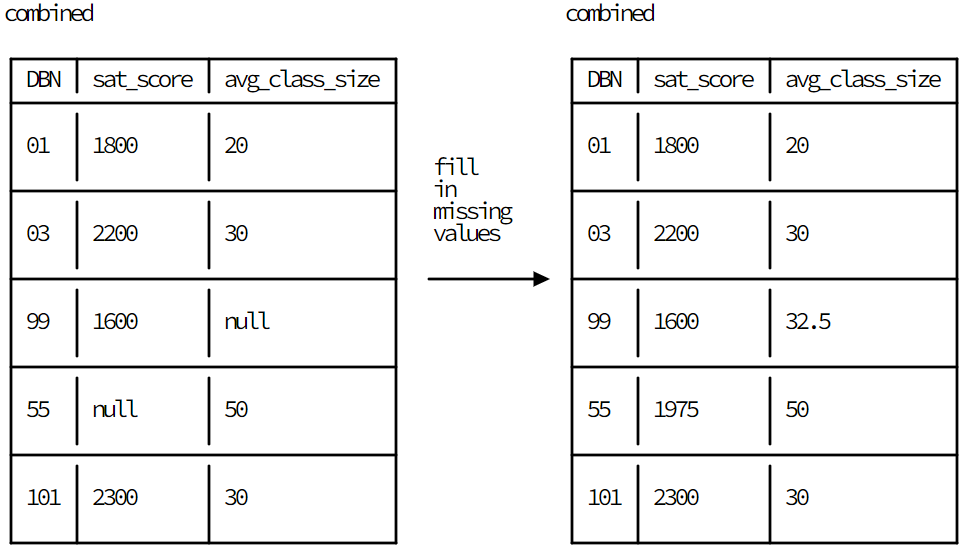

Note that if a column consists entirely of **null** or **NaN** values, pandas won't be able to fill in the missing values when we use the **df.fillna()** method along with the **df.mean()** method, because there won't be a mean.

We should fill any **NaN** or **null** values that remain after the initial replacement with the value **0**. We can do this by passing **0** into the **df.fillna()** method.

In [39]:
# Calculate average of df
means = combined.mean()

# Filling missing values with means
combined = combined.fillna(means)

# Filling missing values left with 0 because still have some column consist entirely of null or NaN values
combined = combined.fillna(0)

# Correct the dataset
combined

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Demographic,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO,...,extracurricular_activities,psal_sports_boys,psal_sports_girls,psal_sports_coed,school_sports,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,153.45,Total Cohort,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78.0,43,55.1,36,46.2,83.7,0,0.0,0.0,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1,1,88.000000,4.000000,22.564286,18.500000,26.571429,0.0,...,"Math through Card Play; Art, Poetry/Spoken Wor...",Softball,Softball,Soccer,"Boxing, Track, CHAMPS, Tennis, Flag Football, ...",The Henry Street Settlement; Asia Society; Ame...,Gouverneur Hospital (Turning Points),New York University,Asia Society,Heart of America Foundation,0,0,United Nations,0,0,8:30 AM,3:30 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to continuing 8th graders,Then to Manhattan students or residents who at...,Then to New York City residents who attend an ...,Then to Manhattan students or residents,Then to New York City residents,0,0,0.0,0.0,0.0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...,40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,10.00,Total Cohort,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124.0,53,42.7,42,33.9,79.2,8,6.5,15.1,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1,1,105.687500,4.750000,22.231250,18.250000,27.062500,0.0,...,"Basketball, Badminton, Handball, Glee, Dance, ...","Basketball, Bowling, Cross Country, Softball, ...","Basketball, Bowling, Cross Country, Softball, ...",0,0,"Grand Street Settlement, Henry Street Settleme...","Gouverneur Hospital, The Door, The Mount Sinai...","New York University, CUNY Baruch College, Pars...","Dance Film Association, Dance Makers Film Work...","W!SE, Big Brothers Big Sisters, Peer Health Ex...",Deloitte LLP Consulting and Financial Services...,0,Movement Research,Incoming students are expected to attend schoo...,"Community Service Requirement, Dress Code Requ...",8:15 AM,3:15 PM,This school will provide students with disabil...,ESL,Not Functionally Accessible,3,Open to New York City residents,For M35B only: Open only to students whose hom...,0,0,0,0,0,0.0,0.0,0.0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202.0,1003214.0,1.002590e+09,Lower East Side ...,40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,153.45,Total Cohort,EAST SIDE COMMUNITY SCHOOL,2006,90.0,70,77.8,67,74.4,95.7,0,0.0,0.0,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6,1,57.600000,2.733333,21.200000,19.400000,22.866667,0.0,...,"After-School Tutoring, Art Portfolio Class

## Adding a School District Column for Mapping

We've finished cleaning and combining our data! We now have a clean data set on which we can base our analysis. Mapping the statistics out on a school district level might be an interesting way to analyze them. Adding a column to the data set that specifies the school district will help us accomplish this.

The school district is just the first two characters of the **DBN**. We can apply a function over the **DBN** column of **combined** that pulls out the first two letters.

In [40]:
# Create column school_dist
combined['school_dist'] = combined['DBN'].apply(lambda col: col[0:2])

# Correct the dataset
combined

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Demographic,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO,...,psal_sports_boys,psal_sports_girls,psal_sports_coed,school_sports,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon,school_dist
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,153.45,Total Cohort,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78.0,43,55.1,36,46.2,83.7,0,0.0,0.0,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1,1,88.000000,4.000000,22.564286,18.500000,26.571429,0.0,...,Softball,Softball,Soccer,"Boxing, Track, CHAMPS, Tennis, Flag Football, ...",The Henry Street Settlement; Asia Society; Ame...,Gouverneur Hospital (Turning Points),New York University,Asia Society,Heart of America Foundation,0,0,United Nations,0,0,8:30 AM,3:30 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to continuing 8th graders,Then to Manhattan students or residents who at...,Then to New York City residents who attend an ...,Then to Manhattan students or residents,Then to New York City residents,0,0,0.0,0.0,0.0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...,40.713764,-73.985260,01
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,10.00,Total Cohort,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124.0,53,42.7,42,33.9,79.2,8,6.5,15.1,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1,1,105.687500,4.750000,22.231250,18.250000,27.062500,0.0,...,"Basketball, Bowling, Cross Country, Softball, ...","Basketball, Bowling, Cross Country, Softball, ...",0,0,"Grand Street Settlement, Henry Street Settleme...","Gouverneur Hospital, The Door, The Mount Sinai...","New York University, CUNY Baruch College, Pars...","Dance Film Association, Dance Makers Film Work...","W!SE, Big Brothers Big Sisters, Peer Health Ex...",Deloitte LLP Consulting and Financial Services...,0,Movement Research,Incoming students are expected to attend schoo...,"Community Service Requirement, Dress Code Requ...",8:15 AM,3:15 PM,This school will provide students with disabil...,ESL,Not Functionally Accessible,3,Open to New York City residents,For M35B only: Open only to students whose hom...,0,0,0,0,0,0.0,0.0,0.0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202.0,1003214.0,1.002590e+09,Lower East Side ...,40.712332,-73.984797,01
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,153.45,Total Cohort,EAST SIDE COMMUNITY SCHOOL,2006,90.0,70,77.8,67,74.4,95.7,0,0.0,0.0,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6,1,57.600000,2.733333,21.200000,19.400000,22.866667,0.0,...,"Basketball, Soccer, Softball","Basketball, Soccer, Softball",0,"Basketball, Bicycling, Fitness, Flag Football,...","University Settlement, Big Brothers Big

# Data Cleaning Walkthrough: Analyzing and Visualizing the Data

## Introduction

Over the last two missions, we began investigating possible relationships between SAT scores and demographics. In order to do this, we acquired several data sets containing information about New York City public schools. We cleaned them, then combined them into a single data set named **combined** that we're now ready to analyze and visualize.

In this mission, we'll discover correlations, create plots, and then make maps. The first thing we'll do is find any correlations between any of the columns and **sat_score**. This will help us determine which columns might be interesting to plot out or investigate further. Afterwards, we'll perform more analysis and make maps using the columns we've identified.

## Finding Correlations With the r Value

Correlations tell us how closely related two columns are. We'll be using the r value, also called [Pearson's correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), which measures how closely two sequences of numbers are correlated.

An r value falls between **-1** and **1**. The value tells us whether two columns are positively correlated, not correlated, or negatively correlated. The closer to **1** the r value is, the stronger the positive correlation between the two columns. The closer to **-1** the r value is, the stronger the negative correlation (i.e., the more "opposite" the columns are). The closer to **0**, the weaker the correlation. To learn more about r values, see the statistics course.

The columns in the following diagram have a strong positive correlation -- when the value in **class_size** is high, the corresponding value in **sat_score** is also high, and vice versa:

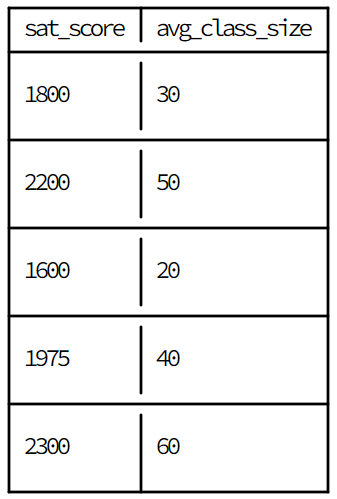

The r value for the columns in the diagram above is **.99**.

The columns in the following diagram have a strong negative correlation -- when the value in **class_size** is high, the corresponding value in **sat_score** is low, and when the value in **sat_score** is high, the value in **class_size** is low:

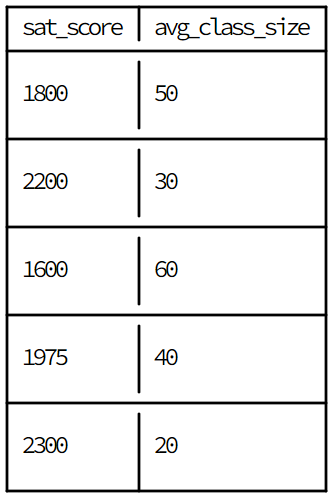

The r value for the columns in the diagram above is **-.99**.

In the next diagram, the columns aren't correlated -- **class_size** and **sat_score** don't have any strong pattern in their values:

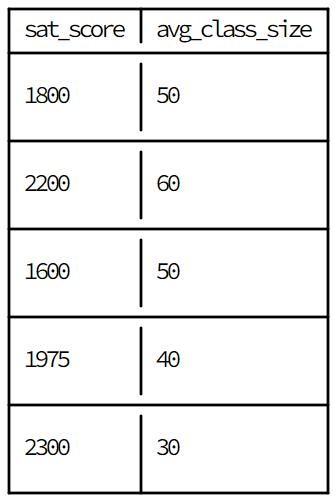

The r value for the columns in the diagram above is **-.02**, which is very close to 0.

In general, r values above **.25** or below **-.25** are enough to qualify a correlation as interesting. An r value isn't perfect, and doesn't indicate that there's a correlation -- just the possiblity of one. To really assess whether or not a correlation exists, we need to look at the data using a scatterplot to see its "shape." For example, here's a scatterplot with a very strong negative r value of **-.73**:

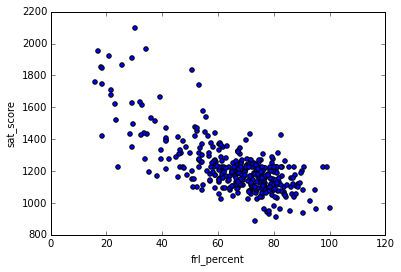

Notice how in the image above, all of the points appear to fall along a line. This pattern indicates a correlation.

Here's a scatterplot with an r value of **.15**, which indicates a weak correlation:

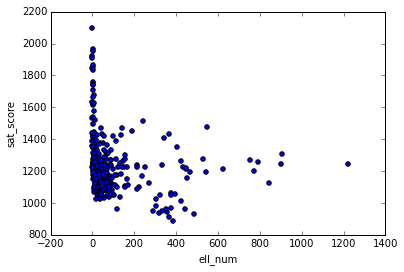

Notice how the data points in the image go in several directions, and there's no clear linear relationship. We'll explore correlations in greater detail later on in the statistics content. For now, this quick primer should be enough to get us through this project.

Because we're interested in exploring the fairness of the SAT, a strong positive or negative correlation between a demographic factor like race or gender and SAT score would be an interesting result meriting investigation. If men tended to score higher on the SAT, for example, that would indicate that the SAT is potentially unfair to women, and vice-versa.

## Finding Correlations With the r Value Continuous

In [41]:
# Find all possiable correlations in df combined
correlations = combined.corr()

# Filter correlations sat_score
correlations = correlations['sat_score']

## Plotting Enrollment With the Plot() Accessor

In [42]:
correlations[:20]

SAT Critical Reading Avg. Score         0.472399
SAT Math Avg. Score                     0.465612
SAT Writing Avg. Score                  0.472854
sat_score                               1.000000
AP Test Takers                          0.254925
Total Exams Taken                       0.250432
Number of Exams with scores 3 4 or 5    0.221759
Total Cohort                            0.161070
Total Grads - % of cohort               0.281050
Total Regents - % of cohort             0.326649
Total Regents - % of grads              0.248047
Advanced Regents - % of cohort          0.375716
Advanced Regents - % of grads           0.361502
Regents w/o Advanced - % of cohort     -0.065460
Regents w/o Advanced - % of grads      -0.218084
Local - % of cohort                    -0.237538
Local - % of grads                     -0.248047
Still Enrolled - % of cohort           -0.239851
Dropped Out - % of cohort              -0.211171
CSD                                     0.080944
Name: sat_score, dty

Unsurprisingly, **SAT Critical Reading Avg. Score**, **SAT Math Avg. Score, SAT Writing Avg. Score**, and **sat_score** are strongly correlated with **sat_score**.

We can also make some other observations:

* **total_enrollment** has a strong positive correlation with **sat_score**. This is surprising because we'd expect smaller schools where students receive more attention to have higher scores. However, it looks like the opposite is true -- larger schools tend to do better on the SAT.
* Other columns that are proxies for enrollment correlate similarly. These include **total_students, N_s, N_p, N_t, AP Test Takers, Total Exams Taken,** and **NUMBER OF SECTIONS**.
* Both the percentage of females (**female_per**) and number of females (**female_num**) at a school correlate positively with SAT score, whereas the percentage of males (**male_per**) and the number of males (**male_num**) correlate negatively. This could indicate that women do better on the SAT than men.
* Teacher and student ratings of school safety (**saf_t_11**, and **saf_s_11**) correlate with **sat_score**.
* Student ratings of school academic standards (**aca_s_11**) correlate with **sat_score**, but this does not hold for ratings from teachers and parents (**aca_p_11** and **aca_t_11**).
* There is significant racial inequality in SAT scores (**white_per**, **asian_per**, **black_per**, **hispanic_per**).
* The percentage of English language learners at the school (**ell_percent**, **frl_percent**) has a strong negative correlation with SAT scores.

Because enrollment seems to have such a strong correlation, let's make a scatterplot of **total_enrollment** vs **sat_score**

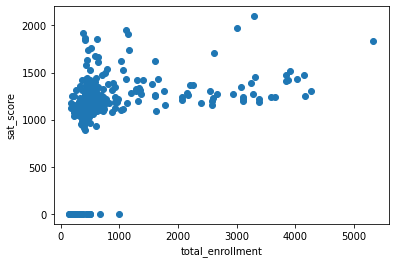

In [43]:
import matplotlib.pyplot as plt

# Plot scatter plot
plt.scatter(combined['total_enrollment'], combined['sat_score'])
plt.ylabel('sat_score')
plt.xlabel('total_enrollment')
plt.show()

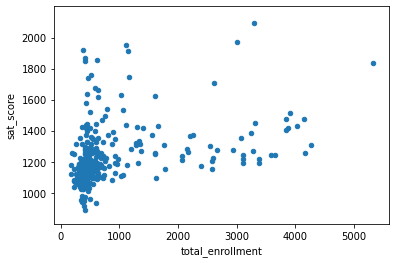

In [44]:
# Plot scatter plot
combined.plot('total_enrollment', 'sat_score', kind='scatter', yticks=[1000,1200, 1400, 1600, 1800,2000], ylim=(800,2200))

## Exploring Schools With Low SAT Scores and Enrollment

Judging from the plot we just created, it doesn't appear that there's an extremely strong correlation between **sat_score** and **total_enrollment**. If there was a very strong correlation, we'd expect all of the points to line up. Instead, there's a large cluster of schools, and then a few others going off in three different directions.

However, there's an interesting cluster of points at the bottom left where **total_enrollment** and sat_score are both low. This cluster may be what's making the r value so high. It's worth extracting the names of the schools in this cluster so we can research them further.

In [45]:
low_enrollment = combined[(combined['sat_score'] < 1000) & (combined['total_enrollment'] < 1000)]

low_enrollment['SCHOOL NAME']

18                            MANHATTAN BUSINESS ACADEMY
19                             BUSINESS OF SPORTS SCHOOL
20            THE HIGH SCHOOL FOR LANGUAGE AND DIPLOMACY
31                 MANHATTAN ACADEMY FOR ARTS & LANGUAGE
32           HUDSON HIGH SCHOOL OF LEARNING TECHNOLOGIES
33             INTERNATIONAL HIGH SCHOOL AT UNION SQUARE
56           THE URBAN ASSEMBLY SCHOOL FOR GREEN CAREERS
57                     THE GLOBAL LEARNING COLLABORATIVE
59                             FRANK MCCOURT HIGH SCHOOL
74     COLUMBIA SECONDARY SCHOOL FOR MATH, SCIENCE, A...
83             HIGH SCHOOL FOR EXCELLENCE AND INNOVATION
91                   INTERNATIONAL COMMUNITY HIGH SCHOOL
103          BRONX STUDIO SCHOOL FOR WRITERS AND ARTISTS
109    ANTONIA PANTOJA PREPARATORY ACADEMY, A COLLEGE...
111                            BRONX BRIDGES HIGH SCHOOL
123    BRONX EARLY COLLEGE ACADEMY FOR TEACHING & LEA...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
126                      BRONX 

## Plotting Language Learning Percentage

Our research on the last screen revealed that most of the high schools with low total enrollment and low SAT scores have high percentages of English language learners. This indicates that it's actually **ell_percent** that correlates strongly with **sat_score**, rather than **total_enrollment**. To explore this relationship further, let's plot out **ell_percent** vs **sat_score**.

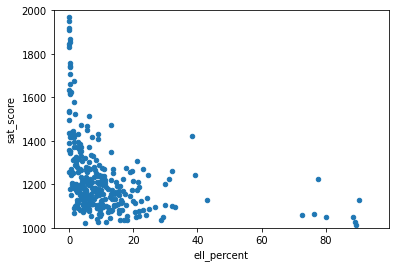

In [46]:
# Create a scatterplot of ell_percent versus sat_score
combined.plot('ell_percent', 'sat_score', kind='scatter', ylim=(1000,2000))
plt.show()

## Calulating Distric-Level Statistics

One way to make very granular statistics easier to read is to aggregate them. In this case, we will aggregate by district, which will enable us to understand how **ell_percent** varies district-by-district instead of the unintelligibly granular school-by-school variation.

In [47]:
# Find the average values for each column for each school_dist in combined.
districts = combined.groupby(by='school_dist').agg('mean')

# Reset the index of districts, making school_dist a column again.
districts.reset_index(inplace=True)

districts.head()

,school_dist,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,Total Grads - % of cohort,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - % of cohort,Local - % of grads,Still Enrolled - % of cohort,Dropped Out - % of cohort,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO,schoolyear,fl_percent,frl_percent,total_enrollment,ell_num,ell_percent,sped_num,sped_percent,asian_num,asian_per,black_num,black_per,hispanic_num,...,female_per,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,postcode,total_students,number_programs,priority08,priority09,priority10,Community Board,Council District,Census Tract,BIN,BBL,lat,lon
0,01,441.833333,473.333333,439.333333,1354.500000,116.681090,173.019231,135.800000,93.500000,71.333333,66.416667,90.616667,15.683333,19.783333,50.733333,70.850000,4.916667,9.383333,17.833333,7.083333,1.0,115.244241,5.148538,22.675415,18.798392,26.553044,0.0,20112012.0,0.0,58.983333,668.500000,42.166667,10.000000,82.000000,17.083333,134.500000,17.516667,125.500000,22.333333,214.833333,...,49.950000,76.500000,85.333333,33.166667,525.368056,38.500000,239.166667,8.233333,7.800000,7.683333,8.016667,7.066667,6.233333,6.700000,7.500000,6.768611,6.165787,6.736713,7.446898,7.433333,6.816667,7.116667,7.683333,7.910896,12.0,0.0,12.0,10003.166667,659.500000,1.333333,0.0,0.0,0.0,3.000000,1.500000,1106.833333,1.004144e+06,1.003302e+09,40.719022,-73.982377
1,02,426.619092,444.186256,424.832836,1142.708333,128.908454,201.516827,157.495833,158.647849,75.453574,64.166074,84.209479,17.921547,20.735281,46.233911,63.472015,11.300100,15.790521,14.785574,7.211787,2.0,149.818949,5.686360,25.038118,20.662667,28.593861,0.0,20112012.0,0.0,63.164583,605.604167,51.625000,13.006250,70.770833,13.212500,118.395833,14.479167,141.145833,24.733333,271.458333,...,55.281250,83.312500,86.416667,38.333333,495.171007,31.687500,190.000000,8.254167,7.495833,7.379167,7.704167,7.404167,6.520833,7.120833,7.564583,6.910660,6.204057,6.650422,7.385029,7.520833,6.720833,7.037500,7.541667,8.875000,12.0,0.0,12.0,10023.770833,621.395833,1.416667,0.0,0.0,0.0,4.204005,2.963296,1132.479744,1.103862e+06,1.070438e+09,40.739699,-73.991386
2,03,428.529851,437.997512,426.915672,987.583333,156.183494,244.522436,193.087500,183.384409,74.029937,63.879937,84.650773,16.388128,19.810481,47.499800,64.856787,10.141838,15.349227,15.522888,7.045205,3.0,156.005994,5.839200,23.716311,19.737593,27.122831,0.0,20112012.0,0.0,58.050000,661.416667,36.916667,9.025000,63.583333,14.500000,68.000000,6.408333,181.833333,34.000000,228.250000,...,52.050000,83.166667,80.833333,36.166667,519.250000,28.166667,206.416667,8.316667,7.541667,7.508333,7.758333,6.675000,5.991667,6.533333,6.991667,6.716667,6.258333,6.633333,7.375000,7.233333,6.616667,6.891667,7.391667,8.500000,12.0,0.0,12.0,10023.750000,717.916667,2.000000,0.0,0.0,0.0,7.500000,6.500000,166.666667,1.034931e+06,1.012833e+09,40.781574,-73.977370
3,04,402.142857,416.285714,405.714286,1224.142857,129.016484,183.879121,151.035714,113.857143,76.257143,57.428571,72.185714,14.100000,16.285714,43.328571,55.900000,18.828571,27.814286,14.557143,6.542857,4.0,132.362265,5.192610,24.101048,19.740816,27.460291,0.0,20112012.0,0.0,71.000000,569.285714,21.571429,4.557143,58.571429,13.214286,61.142857,6.128571,151.714286,30.028571,341.571429,...,69.485714,87.571429,92.714286,41.285714,504.857143,32.428571,193.142857,8.385714,7.657143,7.500000,7.928571,7.871429,7.042857,7.428571,7.885714,6.885714,6.114286,6.685714,7.

# Challenge: Cleaning Data

## Introduction

Avengers

This folder contains the data behind the story [Joining The Avengers Is As Deadly As Jumping Off A Four-Story Building](http://fivethirtyeight.com/features/avengers-death-comics-age-of-ultron).

`avengers.csv` details the deaths of Marvel comic book characters between the time they joined the Avengers and April 30, 2015, the week before Secret Wars #1.

Header | Definition
---|---------
`URL`| The URL of the comic character on the Marvel Wikia
`Name/Alias` | The full name or alias of the character
`Appearances` | The number of comic books that character appeared in as of April 30 
`Current?` | Is the member currently active on an avengers affiliated team?
`Gender` | The recorded gender of the character
`Probationary` | Sometimes the character was given probationary status as an Avenger, this is the date that happened
`Full/Reserve` | The month and year the character was introduced as a full or reserve member of the Avengers
`Year` | The year the character was introduced as a full or reserve member of the Avengers
`Years since joining` | 2015 minus the year
`Honorary` | The status of the avenger, if they were given "Honorary" Avenger status, if they are simply in the "Academy," or "Full" otherwise
`Death1` | Yes if the Avenger died, No if not. 
`Return1` | Yes if the Avenger returned from their first death, No if  they did not, blank if not applicable
`Death2` | Yes if the Avenger died a second time after their revival, No if they did not, blank if not applicable
`Return2` | Yes if the Avenger returned from their second death, No if they did not, blank if not applicable
`Death3` | Yes if the Avenger died a third time after their second revival, No if they did not, blank if not applicable
`Return3` | Yes if the Avenger returned from their third death, No if they did not, blank if not applicable
`Death4` | Yes if the Avenger died a fourth time after their third revival, No if they did not, blank if not applicable
`Return4` | Yes if the Avenger returned from their fourth death, No if they did not, blank if not applicable
`Death5` | Yes if the Avenger died a fifth time after their fourth revival, No if they did not, blank if not applicable
`Return5` | Yes if the Avenger returned from their fifth death, No if they did not, blank if not applicable
`Notes` | Descriptions of deaths and resurrections. 

In [48]:
import pandas as pd

avengers = pd.read_csv('/content/drive/MyDrive/my_datasets/Data Cleaning Walkthrough/avengers.csv', encoding='windows-1252')

avengers 

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,Death1,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,YES,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,http://marvel.wikia.com/Eric_Brooks_(Earth-616)#,Eric Brooks,198,YES,MALE,NaN,13-Nov,2013,2,Full,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,http://marvel.wikia.com/Adam_Brashear_(Earth-6...,Adam Brashear,29,YES,MALE,NaN,14-Jan,2014,1,Full,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,http://marvel.wikia.com/Victor_Alvarez_(Earth-...,Victor Alvarez,45,YES,MALE,NaN,14-Jan,2014,1,Full,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,http://marvel.wikia.com/Ava_Ayala_(Earth-616)#,Ava Ayala,49,YES,FEMALE,NaN,14-Jan,2014,1,Full,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
avengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   URL                          173 non-null    object
 1   Name/Alias                   163 non-null    object
 2   Appearances                  173 non-null    int64 
 3   Current?                     173 non-null    object
 4   Gender                       173 non-null    object
 5   Probationary Introl          15 non-null     object
 6   Full/Reserve Avengers Intro  159 non-null    object
 7   Year                         173 non-null    int64 
 8   Years since joining          173 non-null    int64 
 9   Honorary                     173 non-null    object
 10  Death1                       173 non-null    object
 11  Return1                      69 non-null     object
 12  Death2                       17 non-null     object
 13  Return2                      16 non

## Filtering Out Bad Data

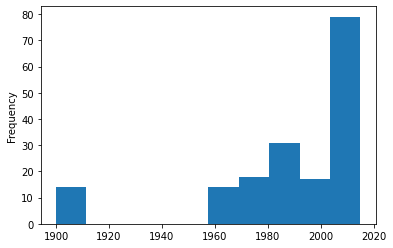

In [50]:
# Plot hist of column Year
avengers['Year'].plot.hist()
plt.show()

Because the data came from a crowdsourced community site, it could contain errors. If you plot a histogram of the values in the Year column, which describes the year Marvel introduced each Avenger, you'll immediately notice some oddities. For example, there are quite a few Avengers who look like they were introduced in 1900, which we know is a little fishy -- the Avengers weren't introduced in the comic series until the 1960's!

In [51]:
 true_avengers = avengers[avengers['Year'] >= 1960]

 true_avengers # dataset has 159 rows left from 173 rows

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,Death1,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,YES,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,http://marvel.wikia.com/Eric_Brooks_(Earth-616)#,Eric Brooks,198,YES,MALE,NaN,13-Nov,2013,2,Full,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,http://marvel.wikia.com/Adam_Brashear_(Earth-6...,Adam Brashear,29,YES,MALE,NaN,14-Jan,2014,1,Full,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,http://marvel.wikia.com/Victor_Alvarez_(Earth-...,Victor Alvarez,45,YES,MALE,NaN,14-Jan,2014,1,Full,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,http://marvel.wikia.com/Ava_Ayala_(Earth-616)#,Ava Ayala,49,YES,FEMALE,NaN,14-Jan,2014,1,Full,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Consolidating Deaths

We're interested in the total number of deaths each character experienced, so we'd like to have a single field containing that information. Right now, there are five fields (**Death1** to **Death5**), each of which contains a binary value representing whether a superhero experienced that death or not. For example, a superhero could experience **Death1**, then Death2, and so on until the writers decided not to bring the character back to life.

In [52]:
deaths = ['Death1', 'Death2', 'Death3', 'Death4', 'Death5']
true_avengers[deaths]

,Death1,Death2,Death3,Death4,Death5
0,YES,NaN,NaN,NaN,NaN
1,YES,NaN,NaN,NaN,NaN
2,YES,NaN,NaN,NaN,NaN
3,YES,NaN,NaN,NaN,NaN
4,YES,YES,NaN,NaN,NaN
...,...,...,...,...,...
168,NO,NaN,NaN,NaN,NaN
169,NO,NaN,NaN,NaN,NaN
170,NO,NaN,NaN,NaN,NaN
171,NO,NaN,NaN,NaN,NaN


In [58]:
# Create a new column, Deaths, that contains the number of times each superhero died. The possible values for each death field are YES, NO, and NaN for missing data.

def clean_deaths(row):
    num_deaths = 0
    columns = ['Death1', 'Death2', 'Death3', 'Death4', 'Death5']
    
    for c in columns:
        death = row[c]
        if pd.isnull(death) or death == 'NO':
            continue
        elif death == 'YES':
            num_deaths += 1
    return num_deaths

true_avengers['Deaths'] = true_avengers.apply(clean_deaths, axis=1)

# Solution 2:
# deaths = ['Death1', 'Death2', 'Death3', 'Death4', 'Death5']

# true_avengers['Deaths'] = true_avengers[deaths].fillna(0).replace('YES', 1).replace('NO', 0).sum(axis=1)

true_avengers.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,Death1,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes,Deaths,years_joining_exact
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...,1,52
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...,1,52
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm...",1,52
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ...",1,52
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,YES,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...,2,52


## Verifying Years Since joining

For our final task, we want to verify that the Years since joining field accurately reflects the Year column. For example, if an Avenger was introduced in the Year 1960, is the Years since joining value for that Avenger 55?

In [59]:
# Because this challenge was created in 2015, use that as the reference year.
# Create new column to calculate exact year joining 
true_avengers['years_joining_exact'] = 2015 - true_avengers['Year']

# Compare 2 columns to filter dataset
true_avengers = true_avengers[true_avengers['Years since joining'] == true_avengers['years_joining_exact']]

# Correct the dataset
true_avengers

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,Death1,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes,Deaths,years_joining_exact
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...,1,52
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...,1,52
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm...",1,52
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ...",1,52
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,YES,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...,2,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,http://marvel.wikia.com/Eric_Brooks_(Earth-616)#,Eric Brooks,198,YES,MALE,NaN,13-Nov,2013,2,Full,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2
169,http://marvel.wikia.com/Adam_Brashear_(Earth-6...,Adam Brashear,29,YES,MALE,NaN,14-Jan,2014,1,Full,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
170,http://marvel.wikia.com/Victor_Alvarez_(Earth-...,Victor Alvarez,45,YES,MALE,NaN,14-Jan,2014,1,Full,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
171,http://marvel.wikia.com/Ava_Ayala_(Earth-616)#,Ava Ayala,49,YES,FEMALE,NaN,14-Jan,2014,1,Full,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
